In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

# Import Data

In [4]:
df = pd.read_csv("/Users/nikhilkudupudi/Projects - School & Work/Datathon/stay-or-stray/train.csv")

In [5]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X131,X132,X133,X134,X135,X136,X137,X138,X139,label
0,7054.0,2.015152,0.0,32.0,NaN,4.0,NaN,NaN,7.0,6.0,...,0.0,NaN,NaN,1.0,1.0,1.0,3.0,2.0,NaN,1
1,147131.0,1.000000,NaN,2.0,NaN,NaN,0.0,NaN,6.0,5.0,...,NaN,NaN,0.0,3.0,1.0,1.0,2.0,10.0,NaN,1
2,132068.0,1.000000,NaN,1.0,NaN,2.0,NaN,0.0,9.0,1.0,...,NaN,NaN,0.0,1.0,1.0,2.0,2.0,4.0,NaN,1
3,85195.0,2.071429,0.0,1.0,NaN,2.0,NaN,NaN,8.0,7.0,...,NaN,NaN,0.0,2.0,2.0,1.0,4.0,2.0,NaN,1
4,191948.0,2.000000,NaN,2.0,0.0,2.0,NaN,NaN,14.0,2.0,...,0.0,0.0,NaN,2.0,2.0,1.0,2.0,6.0,0.0,1


In [6]:
df.shape

(84377, 141)

In [7]:
len(df['ID'].unique()) # unique IDs in the table 

83913

In [6]:
# Drop ID column - not needed as a feature
df = df.drop(['ID'],axis=1)

# Data Preprocessing

    Check statistics

In [8]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X131,X132,X133,X134,X135,X136,X137,X138,X139,label
count,83912.000000,83959.000000,25179.0,83946.000000,25131.0,83947.000000,25137.0,25272.0,83967.000000,84008.000000,...,25084.0,25185.0,25367.0,83936.000000,83985.000000,83967.000000,83929.000000,83966.000000,24981.0,84377.000000
mean,100386.093098,1.585512,0.0,11.740988,0.0,1.906763,0.0,0.0,9.415139,9.026486,...,0.0,0.0,0.0,2.381040,2.567792,2.254326,2.334092,5.735965,0.0,0.792728
std,57993.333045,0.535283,0.0,34.643444,0.0,1.036347,0.0,0.0,17.288043,15.491942,...,0.0,0.0,0.0,2.050817,2.086498,1.989084,2.029105,2.988488,0.0,0.405355
min,5.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000
25%,50010.250000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,3.000000,3.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,3.000000,0.0,1.000000
50%,100614.000000,2.000000,0.0,2.000000,0.0,2.000000,0.0,0.0,6.000000,6.000000,...,0.0,0.0,0.0,2.000000,2.000000,2.000000,2.000000,6.000000,0.0,1.000000
75%,150620.250000,2.000000,0.0,6.000000,0.0,2.000000,0.0,0.0,9.000000,9.000000,...,0.0,0.0,0.0,3.000000,3.000000,2.000000,2.000000,8.000000,0.0,1.000000
max,200906.000000,7.000000,0.0,3605.000000,0.0,13.000000,0.0,0.0,487.000000,449.000000,...,0.0,0.0,0.0,83.000000,87.000000,82.000000,73.000000,30.000000,0.0,1.000000


Many columns seem to have alot of null values and rest of the values only '0'

## Removing Columns 'NA Values' 
    Note - Columns Which pass certain condition will be dropped, not entire all the columns with NA Values

In [9]:
df_null=df.isnull().sum()

In [10]:
df_null

ID         465
X1         418
X2       59198
X3         431
X4       59246
         ...  
X136       410
X137       448
X138       411
X139     59396
label        0
Length: 141, dtype: int64

/Users/nikhilkudupudi/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nikhilkudupudi/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nikhilkudupudi/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


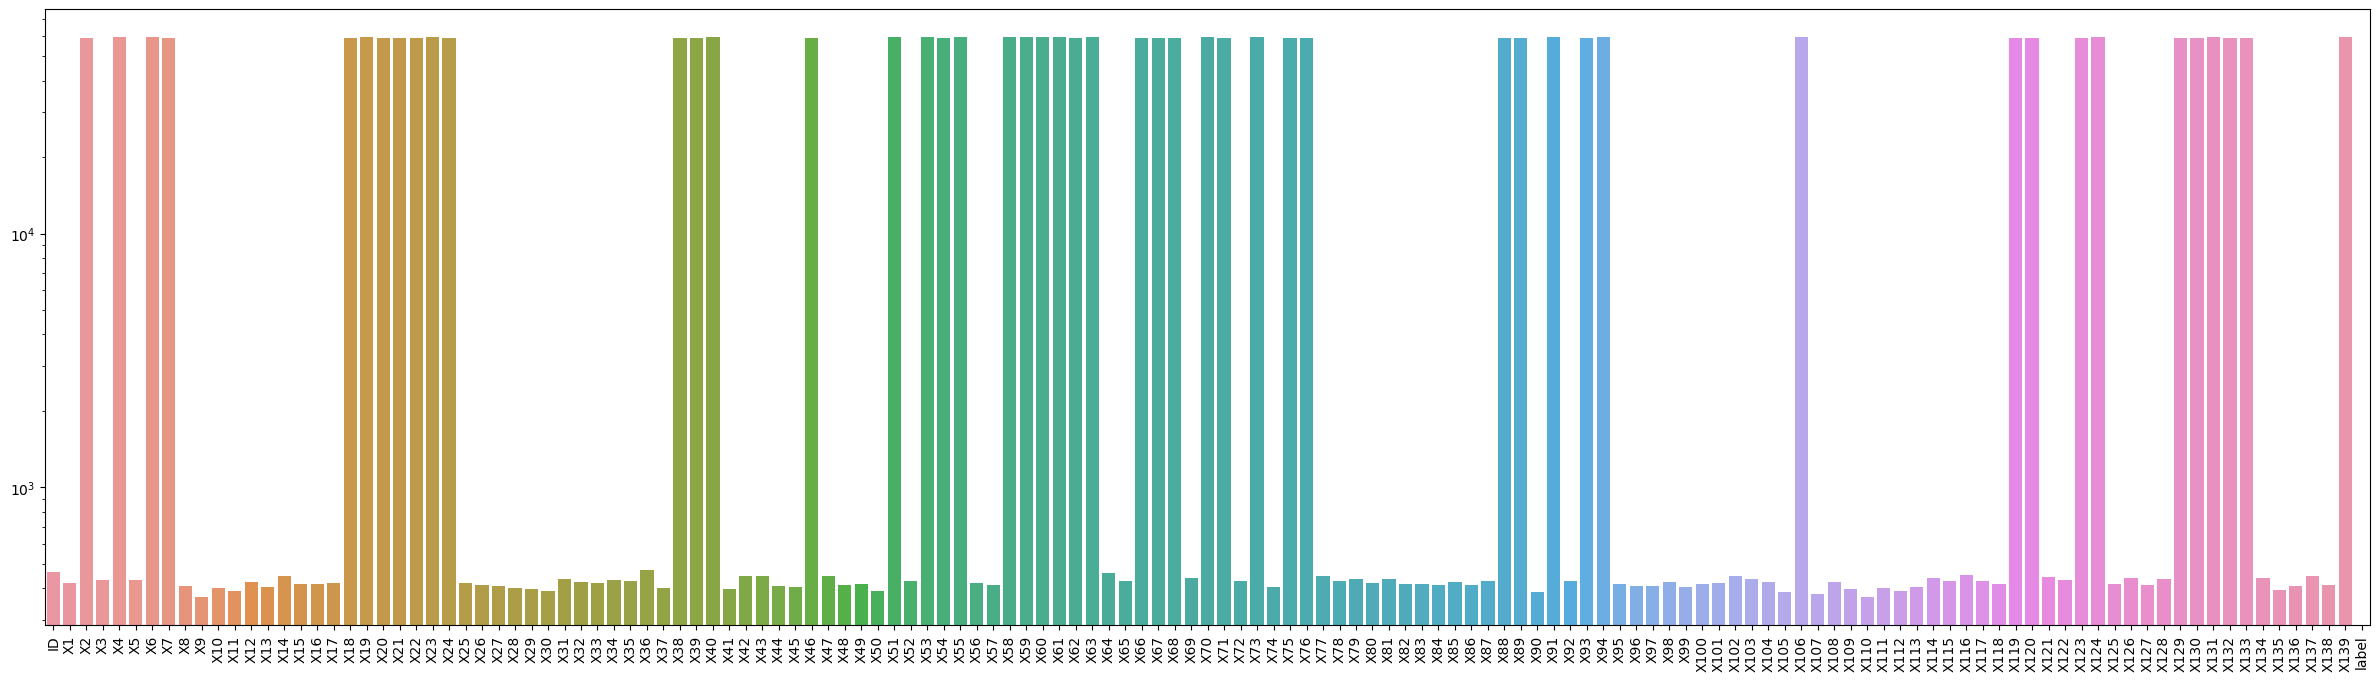

In [11]:
# Plot graph of null values
plt.figure(figsize=(30,8))
sns.barplot(x = df_null.index, y = df_null.values)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

    Looking at the plot, we can further investigte those columns which have na value greater than 10000

In [12]:
# Getting columns with extremely high amount of nulls
max_null_indices=df_null.loc[df_null.values>=10000].index
max_null_indices

Index(['X2', 'X4', 'X6', 'X7', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24',
       'X38', 'X39', 'X40', 'X46', 'X51', 'X53', 'X54', 'X55', 'X58', 'X59',
       'X60', 'X61', 'X62', 'X63', 'X66', 'X67', 'X68', 'X70', 'X71', 'X73',
       'X75', 'X76', 'X88', 'X89', 'X91', 'X93', 'X94', 'X106', 'X119', 'X120',
       'X123', 'X124', 'X129', 'X130', 'X131', 'X132', 'X133', 'X139'],
      dtype='object')

In [13]:
# confirming that the selected columns have only 2 unique values - 0s and nulls
more_than_2_unique=[]
for i in max_null_indices:
    
    #if any column has values other than 0s and nulls, this condition should be satisfied
    if len(df[i].unique())>2:
        more_than_2_unique.append(i)

print(more_than_2_unique)

[]


    As they only have two values that is 0 and 'N.A' value we can drop these columns because median and mean would be zero so we can't do any form of imputation. 

In [17]:
df_2=df.drop(max_null_indices,axis=1)
df_2

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X125,X126,X127,X128,X134,X135,X136,X137,X138,label
0,7054.0,2.015152,32.0,4.0,7.0,6.0,2.0,5.0,2.0,15.0,...,1.0,1.0,18.0,13.0,1.0,1.0,1.0,3.0,2.0,1
1,147131.0,1.000000,2.0,NaN,6.0,5.0,8.0,4.0,7.0,12.0,...,1.0,1.0,9.0,4.0,3.0,1.0,1.0,2.0,10.0,1
2,132068.0,1.000000,1.0,2.0,9.0,1.0,7.0,10.0,7.0,17.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0,1
3,85195.0,2.071429,1.0,2.0,8.0,7.0,9.0,4.0,18.0,8.0,...,1.0,1.0,12.0,12.0,2.0,2.0,1.0,4.0,2.0,1
4,191948.0,2.000000,2.0,2.0,14.0,2.0,2.0,4.0,4.0,3.0,...,1.0,1.0,14.0,3.0,2.0,2.0,1.0,2.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84372,59741.0,2.000000,2.0,1.0,NaN,8.0,9.0,9.0,8.0,18.0,...,1.0,1.0,5.0,1.0,2.0,2.0,3.0,1.0,3.0,1
84373,126082.0,1.142857,40.0,1.0,10.0,42.0,2.0,1.0,19.0,7.0,...,1.0,1.0,12.0,22.0,4.0,4.0,2.0,1.0,6.0,1
84374,31267.0,2.333333,19.0,2.0,3.0,8.0,7.0,3.0,7.0,17.0,...,1.0,1.0,9.0,168.0,2.0,2.0,17.0,5.0,11.0,0
84375,132418.0,2.000000,1.0,NaN,2.0,8.0,5.0,10.0,10.0,15.0,...,1.0,1.0,15.0,10.0,3.0,2.0,1.0,2.0,7.0,1


## Finding Categorical Values

In [21]:
# confirming that the selected columns have only 2 unique values - 0s and nulls
categorical_columns=[]
for i in df_2:
    
    #if any column has values other than 0s and nulls, this condition should be satisfied
    if len(df[i].unique())<3:
        categorical_columns.append(i)

print(categorical_columns)

['label']


    Therfore we can conclude that there are no categorical data in the dataframe after dropping some columns with NA Values

## Train test split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df_2.drop(['label'],axis=1), df_2['label'], test_size=0.2, random_state=42)

## Dealing with rest of the NA Values

    We will use KNN impute strategy to fill NA Values

In [29]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='distance') # also try uniform in weights


x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

## Resampling

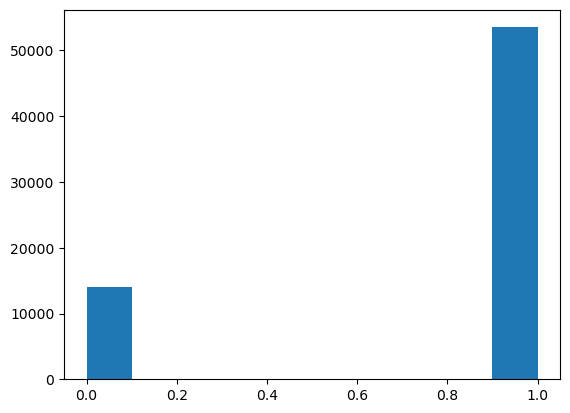

In [35]:
plt.hist(y_train)
plt.show()

### Random Sampling
    we will upsample the minority class 

### SMOTE 

In [61]:
# resample data
smote = SMOTE(sampling_strategy=0.85,random_state=42, k_neighbors=4)
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

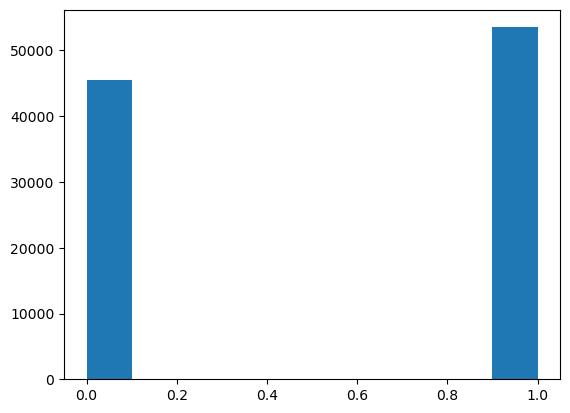

In [62]:
plt.hist(y_train_smote)
plt.show()

# Model training

Tried out default random forest classifier with 5 fold cross validation

In [63]:
# Create a Random Forest Classifier
#rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier = RandomForestClassifier(random_state=42, n_jobs= -1)

# Perform cross-validation with F1 scoring
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)  # 5-fold cross-validation

# Print the F1 scores after each fold
print("F1 Scores for each fold:", cv_scores)

# Calculate and print the mean F1 score
print("Mean F1 Score:", cv_scores.mean())


F1 Scores for each fold: [0.8277666  0.89029349 0.96068725 0.96222028 0.959697  ]
Mean F1 Score: 0.9201329244709321


In [64]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [65]:
# Predict the labels for the test data
y_pred_test = rf_classifier.predict(X_test)

In [66]:
# F1 for test data
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

F1 Score: 0.9189268328392081


Checking on actual test data

In [67]:
df_test = pd.read_csv("/Users/nikhilkudupudi/Projects - School & Work/Datathon/stay-or-stray/test.csv")

In [68]:
df_test

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139
0,17547.0,1.272727,0.0,1.0,0.0,3.0,0.0,0.0,7.0,26.0,...,NaN,NaN,NaN,0.0,2.0,6.0,2.0,4.0,3.0,NaN
1,140449.0,1.000000,0.0,1.0,NaN,1.0,NaN,0.0,8.0,4.0,...,0.0,0.0,NaN,0.0,3.0,2.0,2.0,2.0,5.0,NaN
2,182658.0,2.000000,NaN,2.0,NaN,2.0,NaN,0.0,64.0,2.0,...,NaN,NaN,NaN,NaN,2.0,4.0,1.0,1.0,7.0,0.0
3,149652.0,1.000000,0.0,1.0,NaN,1.0,0.0,0.0,9.0,9.0,...,NaN,NaN,NaN,NaN,3.0,1.0,1.0,2.0,7.0,NaN
4,106304.0,2.000000,NaN,2.0,NaN,3.0,NaN,0.0,1.0,6.0,...,NaN,NaN,NaN,0.0,1.0,2.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,102422.0,1.000000,NaN,2.0,NaN,1.0,NaN,NaN,10.0,7.0,...,NaN,0.0,NaN,0.0,3.0,1.0,1.0,2.0,3.0,NaN
35978,129387.0,2.076923,0.0,1.0,0.0,3.0,0.0,0.0,6.0,5.0,...,NaN,NaN,NaN,0.0,2.0,2.0,2.0,2.0,2.0,0.0
35979,131835.0,1.000000,NaN,1.0,0.0,1.0,NaN,NaN,7.0,9.0,...,NaN,NaN,NaN,NaN,3.0,1.0,2.0,1.0,7.0,NaN
35980,68715.0,1.500000,NaN,23.0,0.0,6.0,NaN,NaN,2.0,22.0,...,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,9.0,NaN


In [70]:
ID = df_test['ID']

In [71]:
df_test = df_test[X_train.columns]

In [69]:
X_train.columns

Index(['X1', 'X3', 'X5', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15',
       'X16', 'X17', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
       'X33', 'X34', 'X35', 'X36', 'X37', 'X41', 'X42', 'X43', 'X44', 'X45',
       'X47', 'X48', 'X49', 'X50', 'X52', 'X56', 'X57', 'X64', 'X65', 'X69',
       'X72', 'X74', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84',
       'X85', 'X86', 'X87', 'X90', 'X92', 'X95', 'X96', 'X97', 'X98', 'X99',
       'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X107', 'X108', 'X109',
       'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118',
       'X121', 'X122', 'X125', 'X126', 'X127', 'X128', 'X134', 'X135', 'X136',
       'X137', 'X138'],
      dtype='object')

In [72]:
df_test

,X1,X3,X5,X8,X9,X10,X11,X12,X13,X14,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
0,1.272727,1.0,3.0,7.0,26.0,48.0,8.0,8.0,9.0,36.0,...,10.0,1.0,1.0,19.0,42.0,2.0,6.0,2.0,4.0,3.0
1,1.000000,1.0,1.0,8.0,4.0,5.0,3.0,1.0,6.0,2.0,...,1.0,1.0,1.0,17.0,3.0,3.0,2.0,2.0,2.0,5.0
2,2.000000,2.0,2.0,64.0,2.0,7.0,8.0,14.0,19.0,4.0,...,13.0,1.0,1.0,16.0,12.0,2.0,4.0,1.0,1.0,7.0
3,1.000000,1.0,1.0,9.0,9.0,10.0,1.0,15.0,19.0,5.0,...,2.0,1.0,1.0,16.0,3.0,3.0,1.0,1.0,2.0,7.0
4,2.000000,2.0,3.0,1.0,6.0,4.0,2.0,4.0,4.0,18.0,...,1.0,1.0,1.0,7.0,1.0,1.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,1.000000,2.0,1.0,10.0,7.0,9.0,10.0,2.0,19.0,5.0,...,1.0,1.0,1.0,7.0,3.0,3.0,1.0,1.0,2.0,3.0
35978,2.076923,1.0,3.0,6.0,5.0,9.0,7.0,13.0,4.0,4.0,...,3.0,1.0,1.0,2.0,19.0,2.0,2.0,2.0,2.0,2.0
35979,1.000000,1.0,1.0,7.0,9.0,4.0,9.0,8.0,18.0,18.0,...,1.0,1.0,1.0,5.0,6.0,3.0,1.0,2.0,1.0,7.0
35980,1.500000,23.0,6.0,2.0,22.0,7.0,8.0,17.0,19.0,5.0,...,2.0,1.0,1.0,16.0,9.0,1.0,4.0,1.0,1.0,9.0


In [73]:
df_test = imputer.transform(df_test)

In [74]:
y_pred= rf_classifier.predict(df_test)

In [75]:
sample_submission = pd.DataFrame()
sample_submission['ID'] = ID
sample_submission['LABEL'] = y_pred

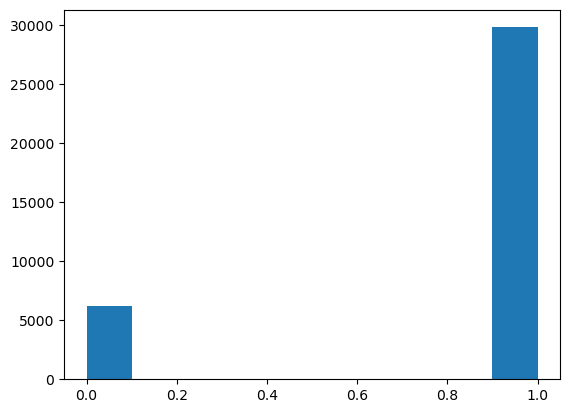

In [76]:
plt.hist(sample_submission['LABEL'])
plt.show()

In [46]:
sample_submission.to_csv('C:/Users/dell/Downloads/submission.csv', index=False)